In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv(r"../Limpieza_de_datos/train.csv")
kaggle_test = pd.read_csv(r"../Limpieza_de_datos/test.csv")

In [66]:
df['FamSize'] = df['SibSp'] + df['Parch'] + 1

#we create features based on the family size
df['Single'] = df['FamSize'].map(lambda s: 1 if s == 1 else 0)
df['SmallF'] = df['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
df['LarF'] = df['FamSize'].map(lambda s: 1 if 5 <= s else 0)

In [67]:
df.Embarked.fillna('S', inplace=True)

df_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
df = pd.concat([df, df_dummies], axis=1)

df.drop('Embarked', axis=1, inplace=True)

In [68]:
df.Cabin.fillna('U', inplace=True)

df['Cabin'] = df['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_dummies], axis=1)

df.drop('Cabin', axis=1, inplace=True)

In [69]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [70]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

df['Title'] = df.Title.map(Title_Dictionary)

dfwoname = df.drop(['Name', 'Ticket'], axis=1)


In [71]:
dfwoname.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,male,22.0,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,1,1,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,female,35.0,1,0,53.1000,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,male,35.0,0,0,8.0500,1,1,...,0,0,0,0,0,0,0,0,1,Mr


In [72]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [73]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [74]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global df
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

In [75]:
df = process_age()

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,Mr


In [77]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

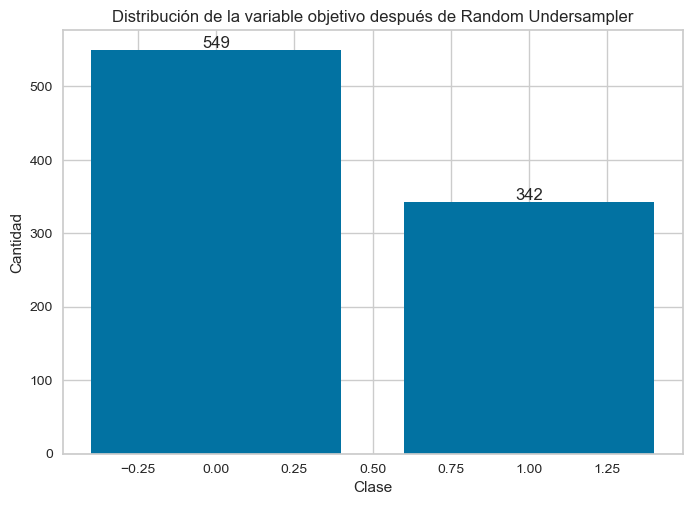

In [78]:
import matplotlib.pyplot as plt

# Datos de la distribución después de aplicar Random Undersampler
clases = [0, 1]
cantidad = [549, 342]

# Crear gráfico de barras
plt.bar(clases, cantidad)

# Agregar etiquetas de conteo en las barras
for i in range(len(clases)):
    plt.text(clases[i], cantidad[i], str(cantidad[i]), ha='center', va='bottom')

# Etiquetas y título del gráfico
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable objetivo después de Random Undersampler')

# Mostrar el gráfico
plt.show()

### Resampling techniques

Como vemos que hay un pequeño imbalance en las clases vamos a explorar algunas tecnicas de resampling para mejorar la prediccion de la clase minoritaria.

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,Mr


In [79]:
df_encoded = df.drop(['Name'], axis=1)

df_encoded = pd.get_dummies(df_encoded, columns=["Title"], prefix=["Title"])

df_encoded = df_encoded.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
df_encoded["Ticket"] = label_encoder.fit_transform(df_encoded["Ticket"])
df_encoded["Sex"] = label_encoder.fit_transform(df_encoded["Sex"])

print(df_encoded.columns.tolist())



['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamSize', 'Single', 'SmallF', 'LarF', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer']


In [109]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis = 1), df_encoded['Survived'], test_size=0.1, random_state=100)

In [492]:
### Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [493]:
### SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [494]:
y_resampled.value_counts()

Survived
0    485
1    485
Name: count, dtype: int64

### Modelo XGB default sin tunear

In [495]:
import xgboost as xgb

In [111]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [112]:
y_pred = xgb_model.predict(X_test)
print(X_test.head(10))



     PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  FamSize  \
205          206       3    0   2.0      0      1     316   10.4625        2   
44            45       3    0  19.0      0      0     282    7.8792        1   
821          822       3    1  27.0      0      0     269    8.6625        1   
458          459       2    0  50.0      0      0     572   10.5000        1   
795          796       2    1  39.0      0      0     223   13.0000        1   
118          119       1    1  24.0      0      1     585  247.5208        2   
424          425       3    1  18.0      1      1     458   20.2125        3   
678          679       3    0  43.0      1      6     566   46.9000        8   
269          270       1    0  35.0      0      0     613  135.6333        1   
229          230       3    0  18.0      3      1     488   25.4667        5   

     Single  ...  Cabin_F  Cabin_G  Cabin_T  Cabin_U  Title_Major  \
205       0  ...        0        1        0       

#### Evaluacion del modelo

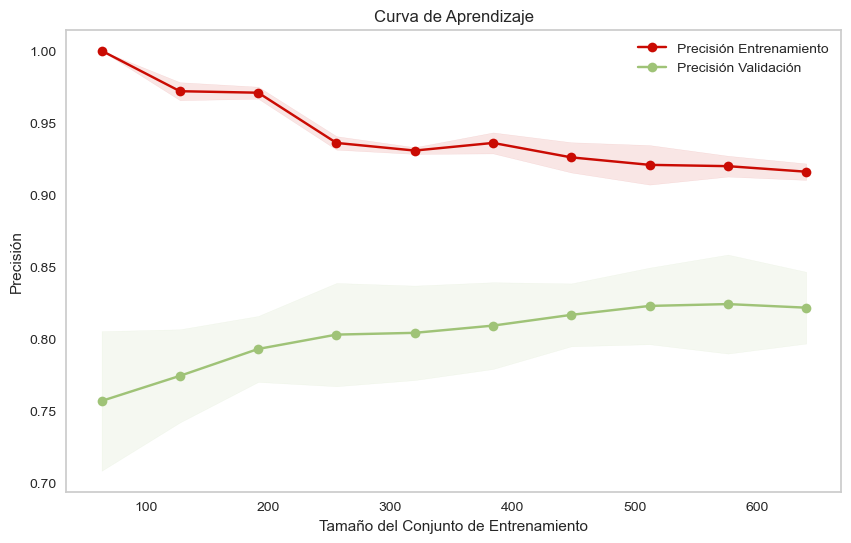

In [113]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


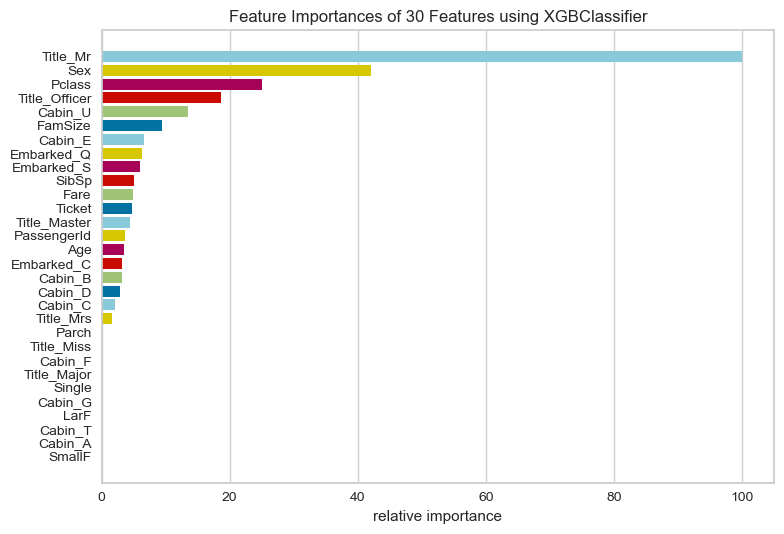

<AxesSubplot:title={'center':'Feature Importances of 30 Features using XGBClassifier'}, xlabel='relative importance'>

In [114]:
import yellowbrick
from yellowbrick.model_selection import FeatureImportances
feature_names = X_train.columns

viz = FeatureImportances(xgb_model, labels=feature_names)

viz.fit(X_train, y_train)

viz.show(feature=20)

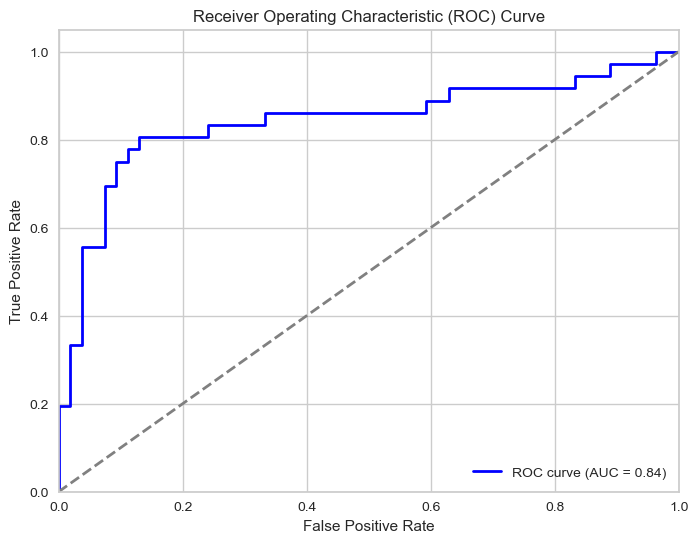

In [115]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

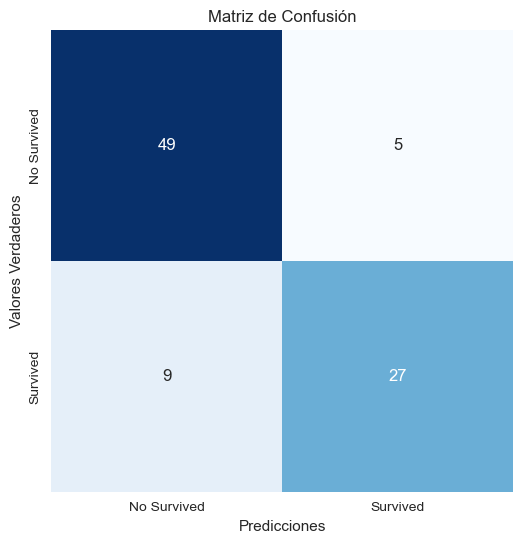

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [117]:
confusion

array([[49,  5],
       [ 9, 27]], dtype=int64)

In [119]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.84      0.75      0.79        36

    accuracy                           0.84        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90



In [105]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8555555555555555


          Feature  Importance
27       Title_Mr    0.399857
1          Pclass    0.099013
2             Sex    0.098157
29  Title_Officer    0.092036
8         FamSize    0.049156
13     Embarked_Q    0.023343
19        Cabin_E    0.022067
4           SibSp    0.019805
25   Title_Master    0.019567
12     Embarked_C    0.019508
7            Fare    0.019203
23        Cabin_U    0.018399
14     Embarked_S    0.017349
6          Ticket    0.014701
3             Age    0.013927
0     PassengerId    0.013496
5           Parch    0.012613
10         SmallF    0.012377
18        Cabin_D    0.010702
17        Cabin_C    0.009555
15        Cabin_A    0.009011
28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000


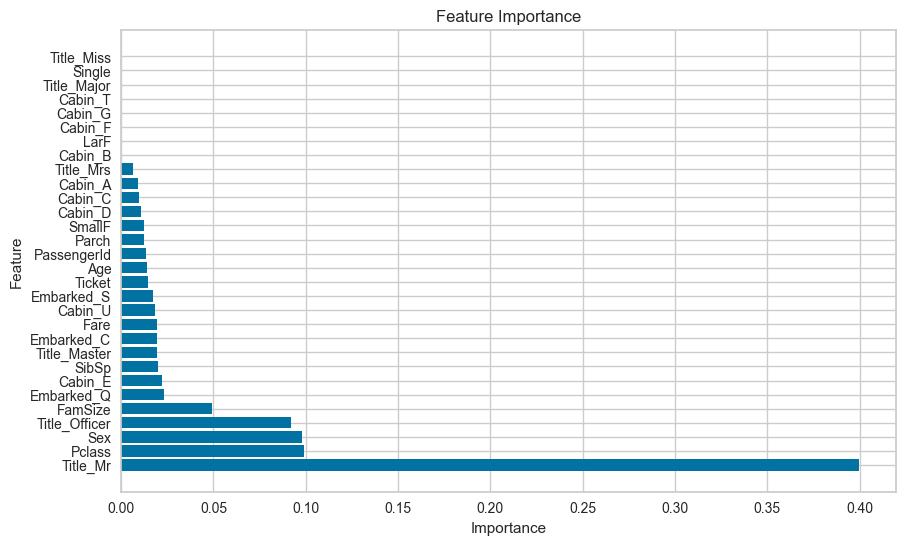

In [499]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [500]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
2             Sex    0.222309
27       Title_Mr    0.219363
28      Title_Mrs    0.078042
7            Fare    0.071405
23        Cabin_U    0.069810
1          Pclass    0.065801
26     Title_Miss    0.054081
6          Ticket    0.041421
8         FamSize    0.031109
10         SmallF    0.028620
3             Age    0.027699
11           LarF    0.023865
4           SibSp    0.012309
25   Title_Master    0.007265
0     PassengerId    0.006889
17        Cabin_C    0.005972
14     Embarked_S    0.005531
5           Parch    0.004644
9          Single    0.004460
19        Cabin_E    0.004407
18        Cabin_D    0.004338
12     Embarked_C    0.004264
16        Cabin_B    0.003335
29  Title_Officer    0.001861
13     Embarked_Q    0.000931
20        Cabin_F    0.000138
21        Cabin_G    0.000131
24    Title_Major    0.000000
22        Cabin_T    0.000000
15        Cabin_A    0.000000


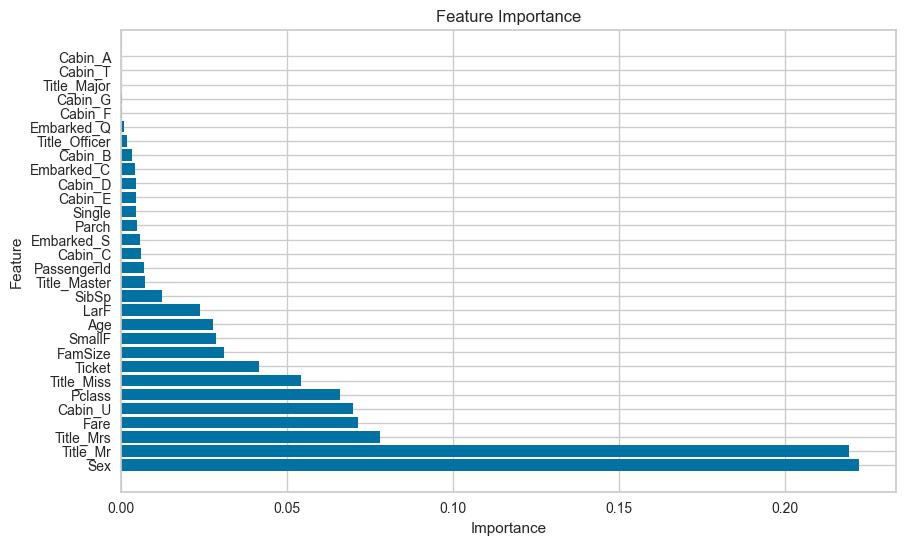

In [501]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [502]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.74      0.77      0.75        26

    accuracy                           0.86        90
   macro avg       0.82      0.83      0.83        90
weighted avg       0.86      0.86      0.86        90



### 2da iteracion usando features mas importantes > 0.01

#### xgb

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [503]:
df_iter = df_encoded.drop(['Title_Mrs', 'Cabin_B', 'LarF', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Title_Major', 'Single', 'Title_Miss', 'SmallF'], axis=1)

In [504]:
df_iter.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamSize,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_C,Cabin_D,Cabin_E,Cabin_U,Title_Master,Title_Mr,Title_Officer
0,1,0,3,1,22.0,1,0,523,7.25,2,...,False,True,False,False,False,False,True,False,True,False


In [505]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.10, random_state=129) #rs: 129

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)



from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


c:\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:440: FutureW

In [506]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report

#param_grid_gbc = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9], 'learning_rate': [0.1, 0.01, 0.001], 'subsample': [0.8, 1.0]}
param_grid_gbc = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01], 'subsample': [0.8, 1.0]}

kfold = StratifiedKFold(n_splits=2, random_state=77, shuffle=True)

# Creamos el modelo
gbc = GradientBoostingClassifier(loss= 'log_loss',random_state=0)

# Definimos el objeto 'scorer' para ajustar automáticamente los hiperparámetros de un modelo usando GridSearchCV 
#scorer = make_scorer(accuracy_score)

# Definimos el GridSearchCV para el modelo GradientBoostingClassifier
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=kfold, n_jobs=-1, scoring='f1_macro')

# Ajustamos GridSearchCV a los datos remuestreados
grid_search_gbc.fit(X_train, y_train)

# Obtenemos el mejor estimador para el modelo GradientBoostingClassifier
best_gbc = grid_search_gbc.best_estimator_

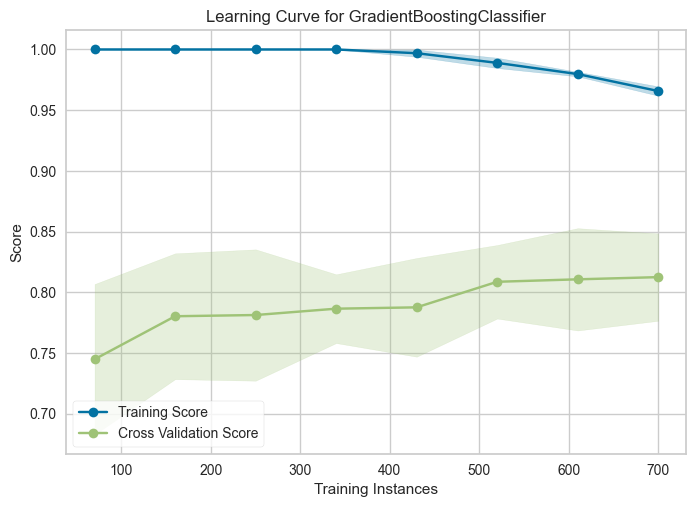

<Axes: title={'center': 'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [507]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from yellowbrick.model_selection import LearningCurve


# Fit the model
best_gbc.fit(X_train, y_train)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=8, random_state=77, shuffle=True)
sizes = np.linspace(0.1, 1.0, 8)

visualizer = LearningCurve(
    best_gbc, cv=cv, scoring=make_scorer(f1_score, average='macro'), train_sizes=sizes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Finalize and render the learning curve
visualizer.show()

In [508]:
# Realizamos las predicciones en el conjunto de prueba
y_pred_gbc = best_gbc.predict(X_test)

# Generamos el informe de clasificación
classification_report_gbc = classification_report(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report_gbc)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix_gbc)

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.92      0.82      0.87        40

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.89        90
weighted avg       0.89      0.89      0.89        90

Gradient Boosting Classifier Confusion Matrix:
[[47  3]
 [ 7 33]]


In [509]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


          Feature  Importance
18       Title_Mr    0.455197
19  Title_Officer    0.163281
8         FamSize    0.072566
1          Pclass    0.056589
15        Cabin_E    0.042775
14        Cabin_D    0.036008
12        Cabin_A    0.017881
7            Fare    0.017569
6          Ticket    0.016595
16        Cabin_U    0.014779
3             Age    0.014299
2             Sex    0.013518
0     PassengerId    0.012492
10     Embarked_Q    0.011046
11     Embarked_S    0.010703
13        Cabin_C    0.010136
4           SibSp    0.009714
5           Parch    0.009245
9      Embarked_C    0.008206
17   Title_Master    0.007399


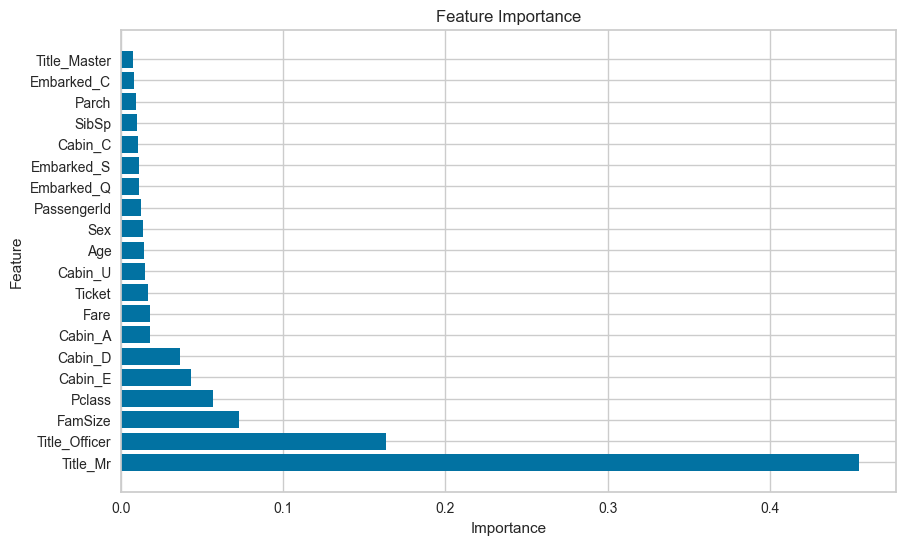

In [510]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [511]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
18       Title_Mr    0.263064
2             Sex    0.246245
7            Fare    0.107231
1          Pclass    0.085709
16        Cabin_U    0.080354
6          Ticket    0.060631
8         FamSize    0.042136
3             Age    0.030008
4           SibSp    0.022149
5           Parch    0.012486
15        Cabin_E    0.008999
0     PassengerId    0.008679
17   Title_Master    0.008477
11     Embarked_S    0.006635
14        Cabin_D    0.006378
13        Cabin_C    0.004085
9      Embarked_C    0.002927
12        Cabin_A    0.001625
10     Embarked_Q    0.001253
19  Title_Officer    0.000929


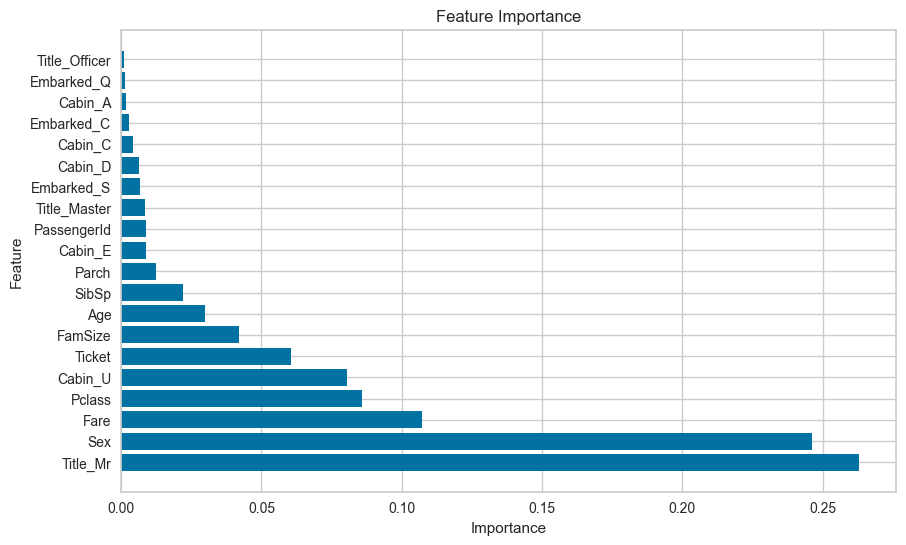

In [512]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [513]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        50
           1       0.94      0.78      0.85        40

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.87        90
weighted avg       0.89      0.88      0.88        90



In [514]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8777777777777778


### rf

25   Title_Master    0.007265
0     PassengerId    0.006889
17        Cabin_C    0.005972
14     Embarked_S    0.005531
5           Parch    0.004644
9          Single    0.004460
19        Cabin_E    0.004407
18        Cabin_D    0.004338
12     Embarked_C    0.004264
16        Cabin_B    0.003335
29  Title_Officer    0.001861
13     Embarked_Q    0.000931
20        Cabin_F    0.000138
21        Cabin_G    0.000131
24    Title_Major    0.000000
22        Cabin_T    0.000000
15        Cabin_A    0.000000

In [20]:
df_iter = df_encoded.drop(['Title_Master', 'PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Title_Officer',
'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Title_Major', 'Cabin_T', 'Cabin_A'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=77)

In [22]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


NameError: name 'xgb' is not defined

In [518]:
y_pred = xgb_model.predict(X_test)


c:\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [519]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8555555555555555


       Feature  Importance
11    Title_Mr    0.491321
1          Sex    0.164584
0       Pclass    0.132473
6      FamSize    0.049569
7       SmallF    0.030708
5         Fare    0.028846
4       Ticket    0.024928
9      Cabin_U    0.024596
3        SibSp    0.024526
2          Age    0.022395
12   Title_Mrs    0.006054
8         LarF    0.000000
10  Title_Miss    0.000000


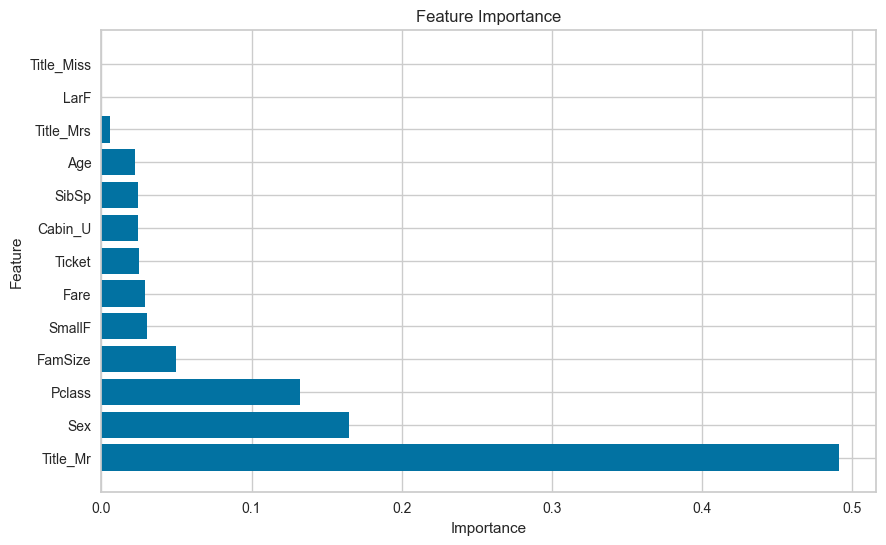

In [520]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [521]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

       Feature  Importance
1          Sex    0.244925
11    Title_Mr    0.212756
10  Title_Miss    0.093262
0       Pclass    0.076885
5         Fare    0.072054
9      Cabin_U    0.069865
12   Title_Mrs    0.068362
4       Ticket    0.041447
2          Age    0.031302
6      FamSize    0.027658
8         LarF    0.026046
7       SmallF    0.019115
3        SibSp    0.016323


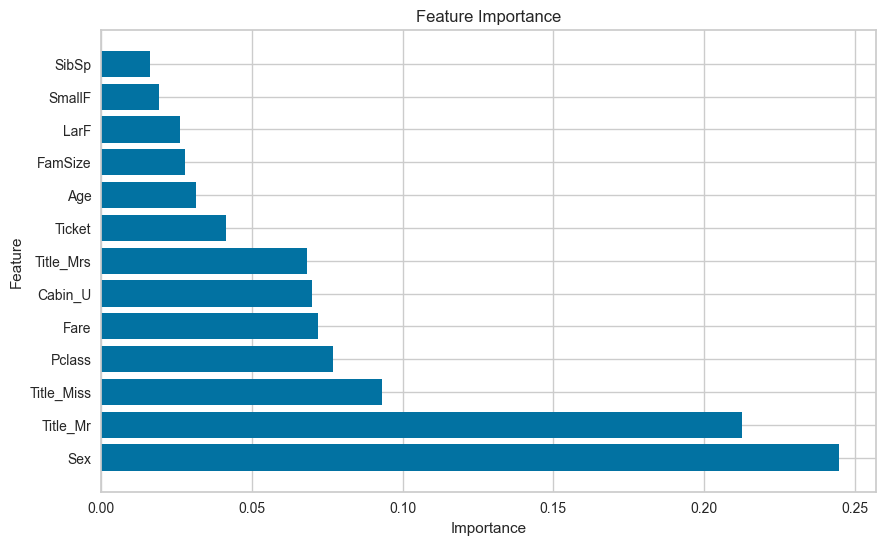

In [522]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [523]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.74      0.77      0.75        26

    accuracy                           0.86        90
   macro avg       0.82      0.83      0.83        90
weighted avg       0.86      0.86      0.86        90



In [524]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555555555555555


### kaggle best model pred

In [23]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

In [39]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        "objective": "multi:softmax",  # Change this based on your problem type
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "num_class": 2,  # Number of classes in the target variable
        "eval_metric": "mlogloss",  # Change this based on your problem type
        "lambda": trial.suggest_float("lambda", 1e-5, 10.0),  # L2 regularization
        "alpha": trial.suggest_float("alpha", 1e-5, 10.0)    # L1 regularization
    }
    
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average="macro")
    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print optimization results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2023-09-13 06:35:33,169] A new study created in memory with name: no-name-cb600d14-f67f-4fc4-a1f5-3ce0a301431d


[I 2023-09-13 06:35:33,512] Trial 0 finished with value: 0.8082466474495551 and parameters: {'n_estimators': 242, 'max_depth': 3, 'learning_rate': 0.022125168415003435, 'subsample': 0.734445198933136, 'colsample_bytree': 0.7686853811760523, 'lambda': 5.474316813928692, 'alpha': 3.6089112378147905}. Best is trial 0 with value: 0.8082466474495551.
[I 2023-09-13 06:35:33,879] Trial 1 finished with value: 0.8190045248868778 and parameters: {'n_estimators': 274, 'max_depth': 10, 'learning_rate': 0.23583842853080905, 'subsample': 0.913868455736757, 'colsample_bytree': 0.6357115917911252, 'lambda': 1.901422405855505, 'alpha': 7.861924819792166}. Best is trial 1 with value: 0.8190045248868778.
[I 2023-09-13 06:35:34,011] Trial 2 finished with value: 0.8178137651821862 and parameters: {'n_estimators': 74, 'max_depth': 7, 'learning_rate': 0.21721493916235685, 'subsample': 0.8151710845409712, 'colsample_bytree': 0.65180508005675, 'lambda': 7.72459615668019, 'alpha': 5.307896136787914}. Best is tr

Number of finished trials:  100
Best trial:
Value:  0.8732556650876968
Params: 
    n_estimators: 246
    max_depth: 9
    learning_rate: 0.25445965490666167
    subsample: 0.6882189976700548
    colsample_bytree: 0.9957112757973928
    lambda: 9.487911452161041
    alpha: 1.4338057631142576


### Usando los parametros para usar técnicas de regularización

In [49]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 246,
    "max_depth": 9,
    "learning_rate": 0.25445965490666167,
    "subsample": 0.6882189976700548,
    "colsample_bytree": 0.9957112757973928,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss",
    "lambda": 9.487911452161041,
    "alpha": 1.4338057631142576 # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

print(X_test)

y_pred_kaggle = final_model.predict(X_test)

     Pclass  Sex   Age  SibSp  Ticket      Fare  FamSize  SmallF  LarF  \
709       3    1   4.0      1     189   15.2458        3       1     0   
439       2    1  31.0      0     547   10.5000        1       0     0   
840       3    1  20.0      0     647    7.9250        1       0     0   
720       2    0   6.0      0     155   33.0000        2       1     0   
39        3    0  14.0      1     186   11.2417        2       1     0   
..      ...  ...   ...    ...     ...       ...      ...     ...   ...   
493       1    1  71.0      0     603   49.5042        1       0     0   
215       1    0  31.0      1     416  113.2750        2       1     0   
309       1    0  30.0      0     584   56.9292        1       0     0   
822       1    1  38.0      0      97    0.0000        1       0     0   
250       3    1  26.0      0     422    7.2500        1       0     0   

     Cabin_U  Title_Miss  Title_Mr  Title_Mrs  
709        1           0         0          0  
439        1   

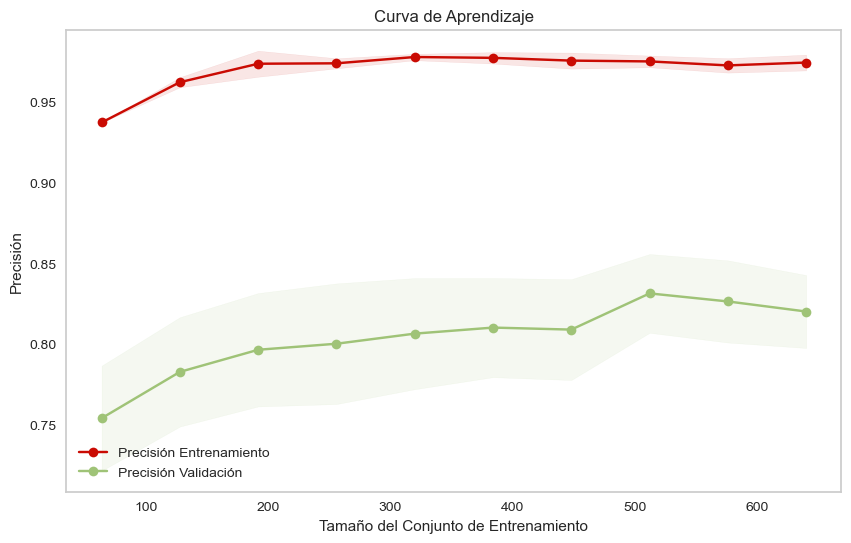

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


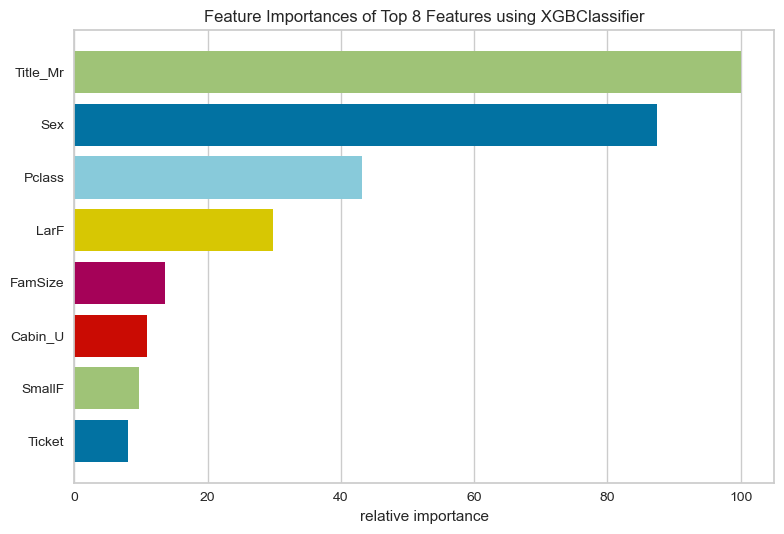

<AxesSubplot:title={'center':'Feature Importances of Top 8 Features using XGBClassifier'}, xlabel='relative importance'>

In [51]:
import yellowbrick
from yellowbrick.model_selection import FeatureImportances
feature_names = X_train.columns

viz = FeatureImportances(final_model, labels=feature_names, topn=8)

viz.fit(X_train, y_train)

viz.show(feature=20)

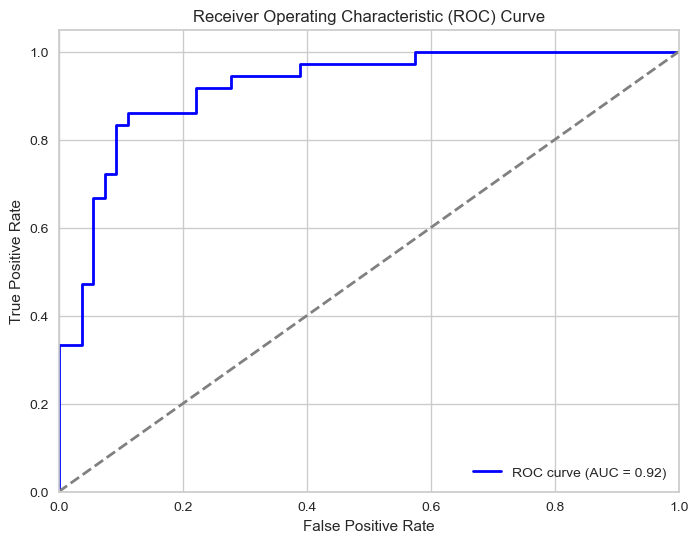

In [52]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

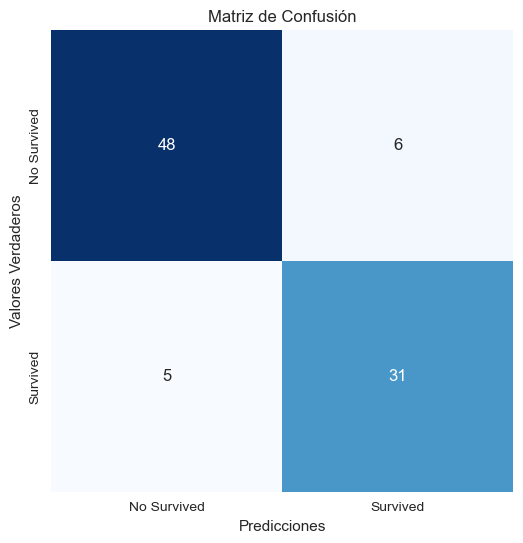

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_kaggle)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [56]:
confusion

array([[48,  6],
       [ 5, 31]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.84      0.86      0.85        36

    accuracy                           0.88        90
   macro avg       0.87      0.88      0.87        90
weighted avg       0.88      0.88      0.88        90



### Sin usar los parametros para usar técnicas de regularización

In [28]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 276,
    "max_depth": 9,
    "learning_rate": 0.1301141693349563,
    "subsample": 0.9855255105298409,
    "colsample_bytree": 0.8924393909687696,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss"#,
    #"lambda": 9.146244200654884,
    #"alpha": 6.356770832676704 # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

print(X_val)

y_pred_kaggle = final_model.predict(X_val)

     Pclass  Sex   Age  SibSp  Ticket      Fare  FamSize  SmallF  LarF  \
709       3    1   4.0      1     189   15.2458        3       1     0   
439       2    1  31.0      0     547   10.5000        1       0     0   
840       3    1  20.0      0     647    7.9250        1       0     0   
720       2    0   6.0      0     155   33.0000        2       1     0   
39        3    0  14.0      1     186   11.2417        2       1     0   
..      ...  ...   ...    ...     ...       ...      ...     ...   ...   
493       1    1  71.0      0     603   49.5042        1       0     0   
215       1    0  31.0      1     416  113.2750        2       1     0   
309       1    0  30.0      0     584   56.9292        1       0     0   
822       1    1  38.0      0      97    0.0000        1       0     0   
250       3    1  26.0      0     422    7.2500        1       0     0   

     Cabin_U  Title_Miss  Title_Mr  Title_Mrs  
709        1           0         0          0  
439        1   

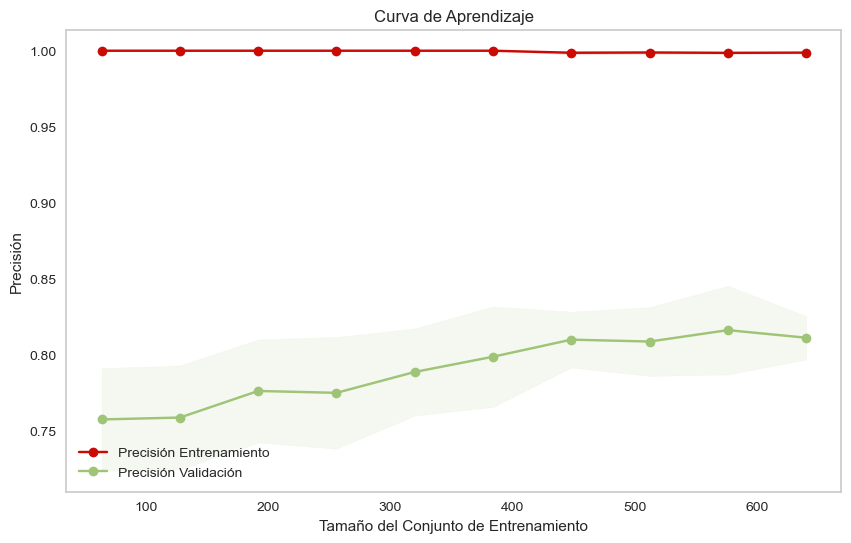

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


ValueError: n_jobs == 0 in Parallel has no meaning

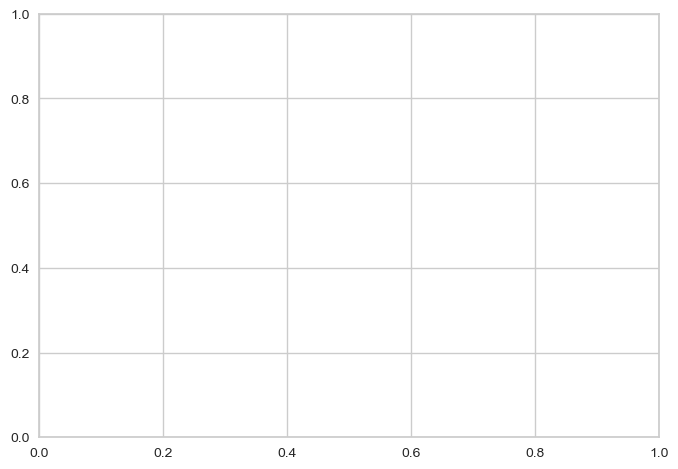

In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from yellowbrick.model_selection import LearningCurve


# Fit the model
final_model.fit(X_train, y_train)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=8, random_state=77, shuffle=True)
sizes = np.linspace(0.1, 1.0, 8)

visualizer = LearningCurve(
    final_model, cv=cv, scoring=make_scorer(f1_score, average='macro'), train_sizes=sizes, n_jobs=1)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Finalize and render the learning curve
visualizer.show()

In [29]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_val, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.82      0.86      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



In [556]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 211,
    "max_depth": 3,
    "learning_rate": 0.14075376362886963,
    "subsample": 0.9702185432549054,
    "colsample_bytree": 0.6679500638509408,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss"  # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

print(X_val)

y_pred_kaggle = final_model.predict(X_val)


c:\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:440: FutureW

     Pclass  Sex   Age  SibSp  Ticket      Fare  FamSize  SmallF  LarF  \
709       3    1   4.0      1     189   15.2458        3       1     0   
439       2    1  31.0      0     547   10.5000        1       0     0   
840       3    1  20.0      0     647    7.9250        1       0     0   
720       2    0   6.0      0     155   33.0000        2       1     0   
39        3    0  14.0      1     186   11.2417        2       1     0   
..      ...  ...   ...    ...     ...       ...      ...     ...   ...   
493       1    1  71.0      0     603   49.5042        1       0     0   
215       1    0  31.0      1     416  113.2750        2       1     0   
309       1    0  30.0      0     584   56.9292        1       0     0   
822       1    1  38.0      0      97    0.0000        1       0     0   
250       3    1  26.0      0     422    7.2500        1       0     0   

     Cabin_U  Title_Miss  Title_Mr  Title_Mrs  
709     True       False     False      False  
439     True   

c:\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [528]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_val, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.82      0.89      0.85        36

    accuracy                           0.88        90
   macro avg       0.87      0.88      0.87        90
weighted avg       0.88      0.88      0.88        90



In [529]:
#kaggle_pred['Survived'] = y_pred_kaggle

#kaggle_pred = kaggle_pred[['PassengerId', 'Survived']]

#kaggle_pred.to_csv('submission.csv', index=False)

In [530]:
# Convert the NumPy array to a pandas DataFrame
kg = pd.DataFrame(y_pred_kaggle)

# Save the DataFrame to a CSV file
csv_filename = "submission.csv"
kg.to_csv(csv_filename, index=False)

In [531]:
#y_pred_kaggle.to_csv('submission.csv', index=False)

In [532]:
kaggle_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [533]:
kaggle_test = pd.read_csv(r"..\Limpieza_de_datos\test.csv")

In [534]:
kaggle_test.shape

(418, 11)

In [535]:
kaggle_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [536]:
kaggle_test['FamSize'] = kaggle_test['SibSp'] + kaggle_test['Parch'] + 1

#we create features based on the family size
kaggle_test['Single'] = kaggle_test['FamSize'].map(lambda s: 1 if s == 1 else 0)
kaggle_test['SmallF'] = kaggle_test['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
kaggle_test['LarF'] = kaggle_test['FamSize'].map(lambda s: 1 if 5 <= s else 0)

kaggle_test.Embarked.fillna('S', inplace=True)


In [537]:

df_dummies = pd.get_dummies(kaggle_test.Embarked, prefix='Embarked')
kaggle_test = pd.concat([kaggle_test, df_dummies], axis=1)

kaggle_test.drop('Embarked', axis=1, inplace=True)

In [538]:
kaggle_test.Cabin.fillna('U', inplace=True)

kaggle_test['Cabin'] = kaggle_test['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(kaggle_test['Cabin'], prefix='Cabin')
kaggle_test = pd.concat([kaggle_test, cabin_dummies], axis=1)

kaggle_test.drop('Cabin', axis=1, inplace=True)

In [539]:
titles = set()
for name in kaggle_test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [540]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

kaggle_test['Title'] = kaggle_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

kaggle_test['Title'] = kaggle_test.Title.map(Title_Dictionary)


dfwoname = kaggle_test.drop(['Name', 'Ticket'], axis=1)


In [541]:
dfwoname.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,SmallF,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Title
0,892,3,male,34.5,0,0,7.8292,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
1,893,3,female,47.0,1,0,7.0000,2,0,1,...,True,False,False,False,False,False,False,False,True,Mrs
2,894,2,male,62.0,0,0,9.6875,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
3,895,3,male,27.0,0,0,8.6625,1,1,0,...,True,False,False,False,False,False,False,False,True,Mr
4,896,3,female,22.0,1,1,12.2875,3,0,1,...,True,False,False,False,False,False,False,False,True,Mrs


In [542]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [543]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [544]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global kaggle_test
    kaggle_test['Age'] = kaggle_test.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return kaggle_test

In [545]:
kaggle_test = process_age()

In [546]:
kaggle_test = kaggle_test.drop(['Name'], axis=1)

kaggle_test = pd.get_dummies(kaggle_test, columns=["Title"], prefix=["Title"])

#kaggle_test = kaggle_test.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
kaggle_test["Ticket"] = label_encoder.fit_transform(kaggle_test["Ticket"])
kaggle_test["Sex"] = label_encoder.fit_transform(kaggle_test["Sex"])



In [547]:
kaggle_test = kaggle_test.drop(['PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Cabin_A'], axis=1)

In [548]:
kaggle_test['Title_Major'] = False

In [549]:
kaggle_test = kaggle_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
        'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Major', 'Title_Master',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer']]

In [550]:
kaggle_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare', 'FamSize', 'SmallF',
       'LarF', 'Cabin_U', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer'],
      dtype='object')

In [551]:
df_iter.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
       'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Miss', 'Title_Mr',
       'Title_Mrs'],
      dtype='object')

In [553]:
final_model.save_model('xgb_model.bin')